In [74]:
import pandas as pd
import numpy as np
import seaborn as sns

titanic_df = pd.read_csv('titanic.csv')


In [ ]:

titanic_df.head(15)

In [ ]:
titanic_df.info()

In [ ]:
titanic_df.describe()

In [ ]:
titanic_df.isna().mean()

In [91]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

titanic_df.head(15)

# 결측치가 수정된 행 frame으로 보여주기
titanic_df[titanic_df['Age'] == titanic_df['Age'].mean()]



,Pclass,Name,Gendr,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,29.679181,1,0,113803,S,1,1912-03-28
106,3,"Moss, Mr. Albert Johan",male,29.679181,0,0,312991,S,1,1912-01-27
156,3,"Corn, Mr. Harry",male,29.679181,0,0,SOTON/OQ 392090,S,0,1912-04-01
185,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,29.679181,1,0,370365,Q,1,1912-03-25
213,3,"Kiernan, Mr. Philip",male,29.679181,1,0,367229,Q,0,1912-02-12
241,2,"Coleridge, Mr. Reginald Charles",male,29.679181,0,0,W./C. 14263,S,0,1912-01-31


In [ ]:
# Embarked 컬럼의 결측치를 'S'로 채우기
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

# Embarked 컬럼의 결측치가 수정된 행 frame으로 보여주기
titanic_df[titanic_df['Embarked'] == 'S']



<Axes: xlabel='Age'>

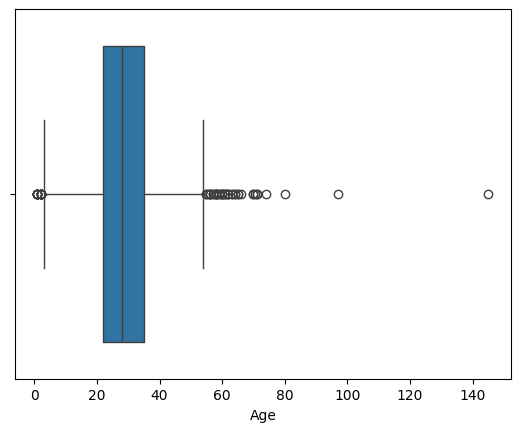

In [92]:
# Age 컬럼의 아웃라이어를 확인하기 위해, Box Plot 그리기
sns.boxplot(x='Age', data=titanic_df)


In [ ]:
# Age 컬럼의 아웃라이어를 확인하기 위해, Scatter Plot 그리기 (x축은 인덱스로 설정)
sns.scatterplot(x=titanic_df.index, y='Age', data=titanic_df)


In [96]:
# Age 컬럼에서 100 이상의 데이터 포인트(데이터 행) 제거하기
titanic_df['Age'] = titanic_df[titanic_df['Age'] < 100]['Age']


titanic_df.drop(titanic_df[titanic_df['Age'] >= 100].index)

# 제거 전후 비교
print("\n[제거 전]")
print(titanic_df.shape)
print("\n[제거 후]")
print(titanic_df[titanic_df['Age'] < 100].shape)
# 제거 전후 비교
pd.DataFrame({
    '제거 전': titanic_df.shape,
    '제거 후': titanic_df[titanic_df['Age'] < 100].shape
}, index=['행 수', '열 수']).T
# Age 컬럼의 아웃라이어 제거 후 데이터프레임 업데이트
titanic_df = titanic_df[titanic_df['Age'] < 100]




[제거 전]
(885, 10)

[제거 후]
(884, 10)


,행 수,열 수
제거 전,885,10
제거 후,884,10


In [97]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       885 non-null    int64  
 1   Name         885 non-null    object 
 2   Gendr        885 non-null    object 
 3   Age          884 non-null    float64
 4   SibSp        885 non-null    int64  
 5   Parch        885 non-null    int64  
 6   Ticket       885 non-null    object 
 7   Embarked     883 non-null    object 
 8   Survived     885 non-null    int64  
 9   ticket_date  885 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 69.3+ KB


In [ ]:
# 변수 이름 "Gendr"를 "Gender"로 변경하기
titanic_df.rename(columns={'Gendr': 'Gender'}, inplace=True)


In [99]:
titanic_df = titanic_df.rename({'Gendr': 'Gender'}, axis=1)
titanic_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       885 non-null    int64  
 1   Name         885 non-null    object 
 2   Gender       885 non-null    object 
 3   Age          884 non-null    float64
 4   SibSp        885 non-null    int64  
 5   Parch        885 non-null    int64  
 6   Ticket       885 non-null    object 
 7   Embarked     883 non-null    object 
 8   Survived     885 non-null    int64  
 9   ticket_date  885 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 69.3+ KB


In [100]:
# Gender 변수의 male을 'M'으로, female을 'F'로 변경하기
titanic_df['Gender'] = titanic_df['Gender'].map({'male': 'M', 'female': 'F'})
titanic_df['Gender']

0      M
1      F
2      F
3      F
4      M
      ..
880    M
881    F
882    F
883    M
884    M
Name: Gender, Length: 885, dtype: object

In [101]:
# Ticket 변수를 띄어쓰기 기준으로 분류하고, 가장 앞부분을 "ticket_head" 라는 이름의 변수로 저장하기
titanic_df['ticket_head'] = titanic_df['Ticket'].str.split().str[0]
titanic_df['ticket_head']




0           A/5
1            PC
2      STON/O2.
3        113803
4        373450
         ...   
880      211536
881      112053
882       W./C.
883      111369
884      370376
Name: ticket_head, Length: 885, dtype: object

In [ ]:
# ticket_head 변수를 소문자로 변경하기
titanic_df['ticket_head'] = titanic_df['ticket_head'].str.lower()


In [107]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       885 non-null    int64  
 1   Name         885 non-null    object 
 2   Gender       885 non-null    object 
 3   Age          884 non-null    float64
 4   SibSp        885 non-null    int64  
 5   Parch        885 non-null    int64  
 6   Ticket       885 non-null    object 
 7   Embarked     883 non-null    object 
 8   Survived     885 non-null    int64  
 9   ticket_date  885 non-null    object 
 10  ticket_head  885 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 76.2+ KB


In [108]:
# ticket_date 변수의 데이터 타입을 datetime으로 변경하기
titanic_df['ticket_date'] = pd.to_datetime(titanic_df['ticket_date'])
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Pclass       885 non-null    int64         
 1   Name         885 non-null    object        
 2   Gender       885 non-null    object        
 3   Age          884 non-null    float64       
 4   SibSp        885 non-null    int64         
 5   Parch        885 non-null    int64         
 6   Ticket       885 non-null    object        
 7   Embarked     883 non-null    object        
 8   Survived     885 non-null    int64         
 9   ticket_date  885 non-null    datetime64[ns]
 10  ticket_head  885 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 76.2+ KB


In [109]:
# ticket_date 변수에서 year 값을 추출하여 'ticket_year' 컬럼으로 저장하기
titanic_df['ticket_year'] = titanic_df['ticket_date'].dt.year   
titanic_df['ticket_year']



0      1912
1      1912
2      1912
3      1912
4      1912
       ... 
880    1912
881    1912
882    1912
883    1912
884    1912
Name: ticket_year, Length: 885, dtype: int32